## **Name: Shruti Patil**

## **Roll No: 22102B2005**

## **BE CMPN B**

## **GitHub Link: https://github.com/shruti10951/Machine-Learning**

## **Problem Statement 4**

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load and Prepare Breast Cancer Dataset
cancer_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
cancer_columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
cancer_data = pd.read_csv(cancer_data_url, header=None, names=cancer_columns)

In [18]:
# Separate Features and Labels
cancer_features = cancer_data.drop(['ID', 'Diagnosis'], axis=1)
cancer_labels = cancer_data['Diagnosis'].replace({'M': 1, 'B': 0})

In [19]:
# Split Data into Training and Testing Sets
cancer_features_train, cancer_features_test, cancer_labels_train, cancer_labels_test = train_test_split(cancer_features, cancer_labels, test_size=0.3, random_state=42)

In [20]:
# Load and Prepare Housing Dataset
housing_data_url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
housing_data = pd.read_csv(housing_data_url)

# Separate Features and Labels
housing_features = housing_data.drop(['median_house_value'], axis=1)
housing_labels = housing_data['median_house_value']

In [21]:
# Split Data into Training and Testing Sets
housing_features_train, housing_features_test, housing_labels_train, housing_labels_test = train_test_split(housing_features, housing_labels, test_size=0.3, random_state=42)

In [22]:
# Initialize the Models
cancer_model = RandomForestClassifier(random_state=42)
housing_model = RandomForestRegressor(random_state=42)

# Train the Models
cancer_model.fit(cancer_features_train, cancer_labels_train)
housing_model.fit(housing_features_train, housing_labels_train)

RandomForestRegressor(random_state=42)

In [23]:
# Make Predictions
cancer_predictions = cancer_model.predict(cancer_features_test)
cancer_probabilities = cancer_model.predict_proba(cancer_features_test)[:, 1]
housing_predictions = housing_model.predict(housing_features_test)

In [24]:
# Calculate Classification Metrics
cancer_accuracy = accuracy_score(cancer_labels_test, cancer_predictions)
cancer_precision = precision_score(cancer_labels_test, cancer_predictions)
cancer_recall = recall_score(cancer_labels_test, cancer_predictions)
cancer_f1 = f1_score(cancer_labels_test, cancer_predictions)
cancer_roc_auc = roc_auc_score(cancer_labels_test, cancer_probabilities)

In [25]:
# Calculate Regression Metrics
housing_mse = mean_squared_error(housing_labels_test, housing_predictions)
housing_r2 = r2_score(housing_labels_test, housing_predictions)

In [26]:
# Output Metrics
print("Classification Metrics")
print(f"Accuracy: {cancer_accuracy}")
print(f"Precision: {cancer_precision}")
print(f"Recall: {cancer_recall}")
print(f"F1 Score: {cancer_f1}")
print(f"ROC AUC: {cancer_roc_auc}")

Classification Metrics
Accuracy: 0.9707602339181286
Precision: 0.9833333333333333
Recall: 0.9365079365079365
F1 Score: 0.9593495934959351
ROC AUC: 0.9968400940623162


In [27]:
print("\nRegression Metrics")
print(f"Mean Squared Error: {housing_mse}")
print(f"R-Squared: {housing_r2}")


Regression Metrics
Mean Squared Error: 2560410737.09187
R-Squared: 0.8146160365959992


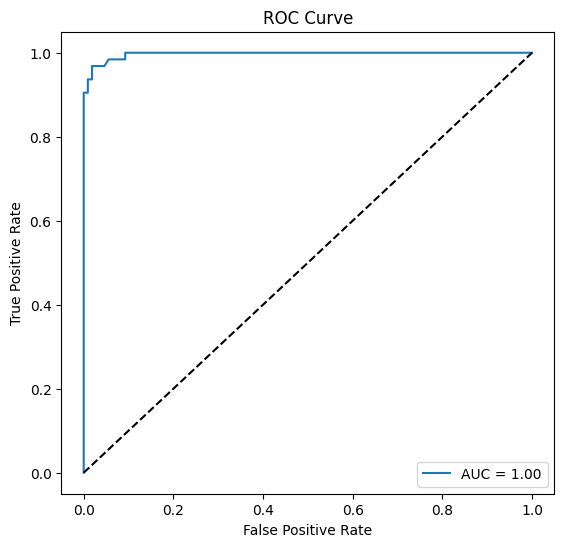

In [28]:
# Plot ROC Curve for Classification Task
fpr, tpr, _ = roc_curve(cancer_labels_test, cancer_probabilities)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {cancer_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

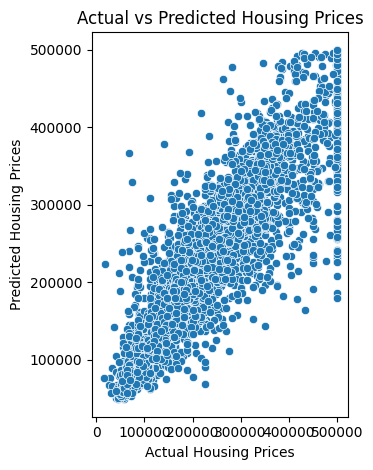

In [29]:
# Plot Actual vs Predicted for Regression Task
plt.subplot(1, 2, 2)
sns.scatterplot(x=housing_labels_test, y=housing_predictions)
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title('Actual vs Predicted Housing Prices')

plt.tight_layout()
plt.show()